In [74]:
import numpy as np
import cv2
import glob
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [97]:
features=[]
all_labels=[]
for i,address in enumerate(glob.glob('archive/Covid19-dataset/train/*/*')):
    img=cv2.imread(address)
    img=cv2.resize(img,(32,32))
    img=img/255.0  
    img=img.flatten()
    features.append(img)
    label=address.split('\\')[-2]
    all_labels.append(label)
    
    if(i%10==0):
       print('[INFO] {}/60 is processed'.format(i))


features=np.array(features)
le=LabelEncoder()
all_labels=le.fit_transform(all_labels)
all_labels=to_categorical(all_labels)

x_train,x_test,y_train,y_test=train_test_split(features,all_labels,test_size=0.2)




[INFO] 0/60 is processed
[INFO] 10/60 is processed
[INFO] 20/60 is processed
[INFO] 30/60 is processed
[INFO] 40/60 is processed
[INFO] 50/60 is processed
[INFO] 60/60 is processed


In [98]:
x_train.shape

(54, 3072)

In [99]:
net=models.Sequential([
                       layers.Dense(1500,activation="relu",input_dim=3072),
                       layers.Dense(750,activation="relu",input_dim=1500),
                       layers.Dense(325,activation="relu",input_dim=750),
                       layers.Dense(150,activation="relu",input_dim=325),
                       layers.Dense(75,activation="relu",input_dim=150),
                       layers.Dense(2,activation="softmax",input_dim=75),


                      ])
print(net.summary())



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 1500)              4609500   
                                                                 
 dense_97 (Dense)            (None, 750)               1125750   
                                                                 
 dense_98 (Dense)            (None, 325)               244075    
                                                                 
 dense_99 (Dense)            (None, 150)               48900     
                                                                 
 dense_100 (Dense)           (None, 75)                11325     
                                                                 
 dense_101 (Dense)           (None, 2)                 152       
                                                                 
Total params: 6,039,702
Trainable params: 6,039,702
N

'\n                       layers.Dense(1500,activation="relu",input_dim=3072),\n                       layers.Dense(750,activation="relu",input_dim=1500),\n                       layers.Dense(325,activation="relu",input_dim=750),\n                       layers.Dense(150,activation="relu",input_dim=325),\n                       layers.Dense(75,activation="relu",input_dim=150),\n                       layers.Dense(2,activation="softmax",input_dim=75),\n'

In [105]:
net.compile(optimizer='adam',
            metrics=["accuracy"],
            loss="categorical_crossentropy"
            )

In [106]:
out=net.fit(x_train,y_train,batch_size=16,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
4/4 [==============================] - 1s 144ms/step - loss: 2.6996 - accuracy: 0.6111 - val_loss: 1.0358 - val_accuracy: 0.3571
Epoch 2/25
4/4 [==============================] - 0s 74ms/step - loss: 1.0227 - accuracy: 0.4259 - val_loss: 1.1643 - val_accuracy: 0.3571
Epoch 3/25
4/4 [==============================] - 0s 66ms/step - loss: 0.7507 - accuracy: 0.4815 - val_loss: 1.0682 - val_accuracy: 0.3571
Epoch 4/25
4/4 [==============================] - 0s 65ms/step - loss: 0.6818 - accuracy: 0.6481 - val_loss: 0.5476 - val_accuracy: 0.6429
Epoch 5/25
4/4 [==============================] - 0s 60ms/step - loss: 0.5317 - accuracy: 0.6852 - val_loss: 0.7824 - val_accuracy: 0.3571
Epoch 6/25
4/4 [==============================] - 0s 64ms/step - loss: 0.5365 - accuracy: 0.6667 - val_loss: 0.2439 - val_accuracy: 0.9286
Epoch 7/25
4/4 [==============================] - 0s 65ms/step - loss: 0.5198 - accuracy: 0.6852 - val_loss: 0.2726 - val_accuracy: 0.9286
Epoch 8/25
4/4 [==========

In [107]:
net.save('Covid MLP.h5')

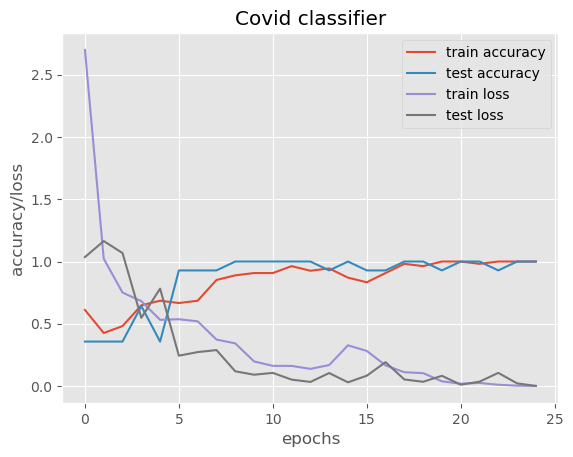

In [108]:
plt.plot(out.history["accuracy"],label="train accuracy")
plt.plot(out.history["val_accuracy"],label="test accuracy")
plt.plot(out.history["loss"],label="train loss")
plt.plot(out.history["val_loss"],label="test loss")
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("Covid classifier")
plt.legend()
#plt.savefig('cifar classifier-with Batch norm.jpg', dpi=300)
plt.show('center')